In [54]:
import pandas as pd
import numpy as np
from config import *

In [2]:
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [3]:
engine = create_engine(conn2, echo=False) 

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)  

In [5]:
from os import listdir

In [107]:
filepaths = ['csvs/' + f for f in listdir("csvs")]
df = pd.concat(map(pd.read_csv, filepaths))
df = df.drop_duplicates(subset=['id_str'])
len(df)

232058

In [108]:
df = df.reset_index()
df = df.drop(columns=['index'])
df.tail(1)

,created,id_str,text,user_id,screen_name,location,followers_count,user_favourites_count,time_zone,geo_enabled,verified,status_count,geo,coords,retweet_count,tweet_favourite_count,Subjectivity,Polarity,Sentiment
232057,2021-03-15 00:02:57,1371250530123718660,Found my old WHO vaccine cert booklet from whe...,92157908,Juliagoolia1982,Anywhere but here,761,16382,NaN,True,False,13107,NaN,NaN,0,0,0.2,0.1,positive


In [109]:
# text dataframe
text_df = df[['id_str', 'text','Sentiment']]
text_df.head(2)

,id_str,text,Sentiment
0,1367263516457979910,Shieldk2 Yes! My wife works for Pfizer and has...,neutral
1,1367263515656867840,"oleary_ray: ""I will not be taking the Covid va...",positive


In [110]:
text_df['text'] = [row.lower() for row in text_df['text']]
text_df.head(2)

<ipython-input-110-6481fe273aec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = [row.lower() for row in text_df['text']]


,id_str,text,Sentiment
0,1367263516457979910,shieldk2 yes! my wife works for pfizer and has...,neutral
1,1367263515656867840,"oleary_ray: ""i will not be taking the covid va...",positive


In [117]:
def KeyWord(df, search_terms):
    cond = list(map(df['text'].str.contains, search_terms))
    df['mo'] = np.select(cond, search_terms, '0')
    return df

In [118]:
pf = ['pfizer','pfizerbiontech','pfizer-biontech']
az = ['astrazeneca','astra zeneca','astra-zeneca']
mo = ['moderna']

In [ ]:
KeyWord(text_df,mo)

In [121]:

text_df.tail()

,id_str,text,Sentiment,pf,az,mo
232053,1371250540449988610,f0lake: no i dont think u understand i need to...,neutral,pfizer,0,0
232054,1371250536633208834,peterhotez: it’s why we might eventually move ...,positive,pfizer,0,moderna
232055,1371250532568956935,web_rant: mikeallen axios kadiagoba gosh mike ...,neutral,0,0,0
232056,1371250531516223488,reuters: astrazeneca finds no evidence of incr...,neutral,0,astrazeneca,0
232057,1371250530123718660,found my old who vaccine cert booklet from whe...,positive,0,0,0


In [122]:
from textblob import TextBlob

In [123]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [124]:
def Tokenize(txt):
    return TextBlob(txt).words

In [125]:
def RemoveStopWords(lst):
    stop_words = stopwords.words('english')
    no_stopwords = [word for word in lst if not word in stop_words]
    return no_stopwords

In [126]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

def Stem(lst):
    new_list = [ps.stem(item) for item in lst]
    return new_list


In [127]:
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\guyan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [128]:

def Lemmatize(lst):
    lemmas = [wnl.lemmatize(item) for item in lst]
    return lemmas

In [55]:
lit = ['fur','furry', 'churches','dogs','speak','spoken','speaking','spoke']
new_lit = Stem(lit)
new_lit

['fur', 'furri', 'church', 'dog', 'speak', 'spoken', 'speak', 'spoke']

In [56]:
new_lit2 = Lemmatize(new_lit)
new_lit2

['fur', 'furri', 'church', 'dog', 'speak', 'spoken', 'speak', 'spoke']

In [129]:
text_df['tokens'] = text_df['text'].apply(Tokenize)
text_df['clean_tokens'] = text_df['tokens'].apply(RemoveStopWords)
text_df['clean_lemmas'] = text_df['clean_tokens'].apply(Lemmatize)

text_df.head(3)

<ipython-input-129-74ab1d556f23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['tokens'] = text_df['text'].apply(Tokenize)
<ipython-input-129-74ab1d556f23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['clean_tokens'] = text_df['tokens'].apply(RemoveStopWords)
<ipython-input-129-74ab1d556f23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,id_str,text,Sentiment,pf,az,mo,tokens,clean_tokens,clean_lemmas
0,1367263516457979910,shieldk2 yes! my wife works for pfizer and has...,neutral,pfizer,0,0,"[shieldk2, yes, my, wife, works, for, pfizer, ...","[shieldk2, yes, wife, works, pfizer, working, ...","[shieldk2, yes, wife, work, pfizer, working, v..."
1,1367263515656867840,"oleary_ray: ""i will not be taking the covid va...",positive,0,0,0,"[oleary_ray, i, will, not, be, taking, the, co...","[oleary_ray, taking, covid, vaccine, covid, re...","[oleary_ray, taking, covid, vaccine, covid, re..."
2,1367263515388567563,"cdc's report on j&amp;j covid-19 vaccine - ""ac...",positive,0,0,0,"[cdc, 's, report, on, j, amp, j, covid-19, vac...","[cdc, 's, report, j, amp, j, covid-19, vaccine...","[cdc, 's, report, j, amp, j, covid-19, vaccine..."


In [130]:
text_df = text_df.drop(columns=['tokens','clean_tokens'])
text_df.head(2)

,id_str,text,Sentiment,pf,az,mo,clean_lemmas
0,1367263516457979910,shieldk2 yes! my wife works for pfizer and has...,neutral,pfizer,0,0,"[shieldk2, yes, wife, work, pfizer, working, v..."
1,1367263515656867840,"oleary_ray: ""i will not be taking the covid va...",positive,0,0,0,"[oleary_ray, taking, covid, vaccine, covid, re..."


In [166]:
# save a copy 
text_df.to_csv('lemmas.csv', index=False, encoding='UTF-8')

# Create Clouds

In [132]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 


In [153]:
def MakeString(obj):
    new_list = str(obj)
    return new_list

In [167]:
text_df['clean_text'] = text_df['clean_lemmas'].apply(MakeString)
text_df = text_df.drop(columns=('clean_lemmas'))
text_df.tail()

,id_str,text,Sentiment,pf,az,mo,clean_text
232053,1371250540449988610,f0lake: no i dont think u understand i need to...,neutral,pfizer,0,0,"['f0lake', 'dont', 'think', 'u', 'understand',..."
232054,1371250536633208834,peterhotez: it’s why we might eventually move ...,positive,pfizer,0,moderna,"['peterhotez', '’', 'might', 'eventually', 'mo..."
232055,1371250532568956935,web_rant: mikeallen axios kadiagoba gosh mike ...,neutral,0,0,0,"['web_rant', 'mikeallen', 'axios', 'kadiagoba'..."
232056,1371250531516223488,reuters: astrazeneca finds no evidence of incr...,neutral,0,astrazeneca,0,"['reuters', 'astrazeneca', 'find', 'evidence',..."
232057,1371250530123718660,found my old who vaccine cert booklet from whe...,positive,0,0,0,"['found', 'old', 'vaccine', 'cert', 'booklet',..."


In [168]:
def PlotCloud(df, plot_name):
    words = ' '.join([twt for twt in df['clean_text']])
    cloud =WordCloud(width = 700, height = 500, random_state =21, max_font_size =119, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(words)
    plt.imshow(cloud, interpolation ='bilinear')
    plt.axis('off')
    plt.savefig(plot_name)
    plt.show()
    

In [169]:
astrazeneca_df = text_df.loc[text_df['az'] != '0']
moderna_df = text_df.loc[text_df['mo'] != '0']
pfizer_df = text_df.loc[text_df['pf'] != '0']
vaccine_df = text_df.loc[(text_df['az'] == '0') & (text_df['mo'] == '0') & (text_df['pf'] == '0')]

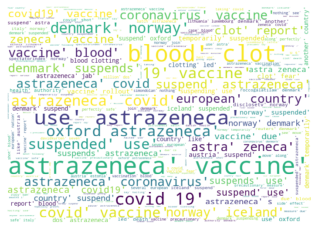

In [170]:
PlotCloud(astrazeneca_df,'cloud-az.png')

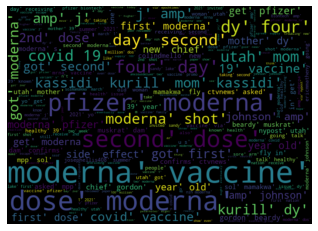

In [162]:
PlotCloud(moderna_df,'cloud-mo.png')

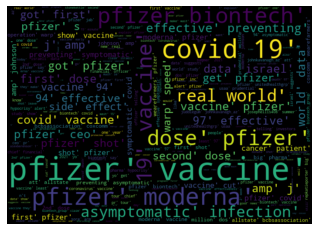

In [163]:
PlotCloud(pfizer_df,'cloud-pf.png')

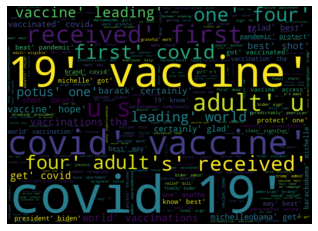

In [164]:
PlotCloud(vaccine_df,'cloud-vac.png')